choosing random point on surface of cylinder


In [34]:
import numpy as np
import math
import random
#from models.brownian1 import brownianClass
import matplotlib.pyplot as plt

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors=cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 


In [35]:
class brownian:
    # initializes brownian w x,y,z parameters. self. walk=brownian(x,y,z) bc telling it to define itself
    def __init__(self, xi, yi, zi): #constructor
        # setting xi parameter position (so self.xi is location x on brownian(x,y,z))
        self.xi = xi
        self.yi = yi
        self.zi = zi

    def path(self, nsteps):  #define path itself, so path(100) means nsteps=100 so move 100 times
        # wiener motion, going to create an array w number of steps particle takes from initial position xi
        wx=np.ones(nsteps+1)*self.xi #array filled w same starting point xi
        wy=np.ones(nsteps+1)*self.yi #add one to include origin w number of steps
        wz=np.ones(nsteps+1)*self.zi
        walk=np.zeros((nsteps+1,3))#nsteps+1 is number of rows (add onw for start position) 3 dimensions
        walk[0]=[self.xi,self.yi,self.zi] #initial start position 0
        print(self.xi,self.yi,self.zi)
    # randomly generate motion in x or y dir from starting point
        for i in range(1, nsteps+1): 
            xii = np.random.choice([-1, 1])
            yii = np.random.choice([-1, 1])
            zii = np.random.choice([-1, 1])
            # weiner process in each direction
            wx[i]=wx[i-1]+(xii/np.sqrt(nsteps)) #moving from previous point dont need cumsum()
            wy[i]=wy[i-1]+(yii/np.sqrt(nsteps))
            wz[i]=wz[i-1]+(zii/np.sqrt(nsteps))
            print('next step after:',wx[i], wy[i], wz[i])
            walk[i]=[wx[i],wy[i],wz[i]]
        print(walk)

        return walk

    
                  


0.05020489764056009 -0.1935961473090332 7.609314515182068
next step after: -0.26602286837627787 0.12263161870780473 7.925542281198906
next step after: -0.5822506343931158 0.4388593847246427 8.241770047215743
next step after: -0.2660228683762778 0.7550871507414807 8.55799781323258
next step after: 0.05020489764056013 1.0713149167583187 8.241770047215743
next step after: 0.36643266365739807 0.7550871507414807 7.925542281198905
next step after: 0.05020489764056013 1.0713149167583187 8.241770047215743
next step after: -0.2660228683762778 1.3875426827751567 7.925542281198905
next step after: 0.05020489764056013 1.7037704487919947 8.241770047215743
next step after: -0.2660228683762778 2.0199982148088327 7.925542281198905
next step after: 0.05020489764056013 1.7037704487919947 8.241770047215743
[[ 0.0502049  -0.19359615  7.60931452]
 [-0.26602287  0.12263162  7.92554228]
 [-0.58225063  0.43885938  8.24177005]
 [-0.26602287  0.75508715  8.55799781]
 [ 0.0502049   1.07131492  8.24177005]
 [ 0.3

Text(0.5, 0.92, 'brownian walk')

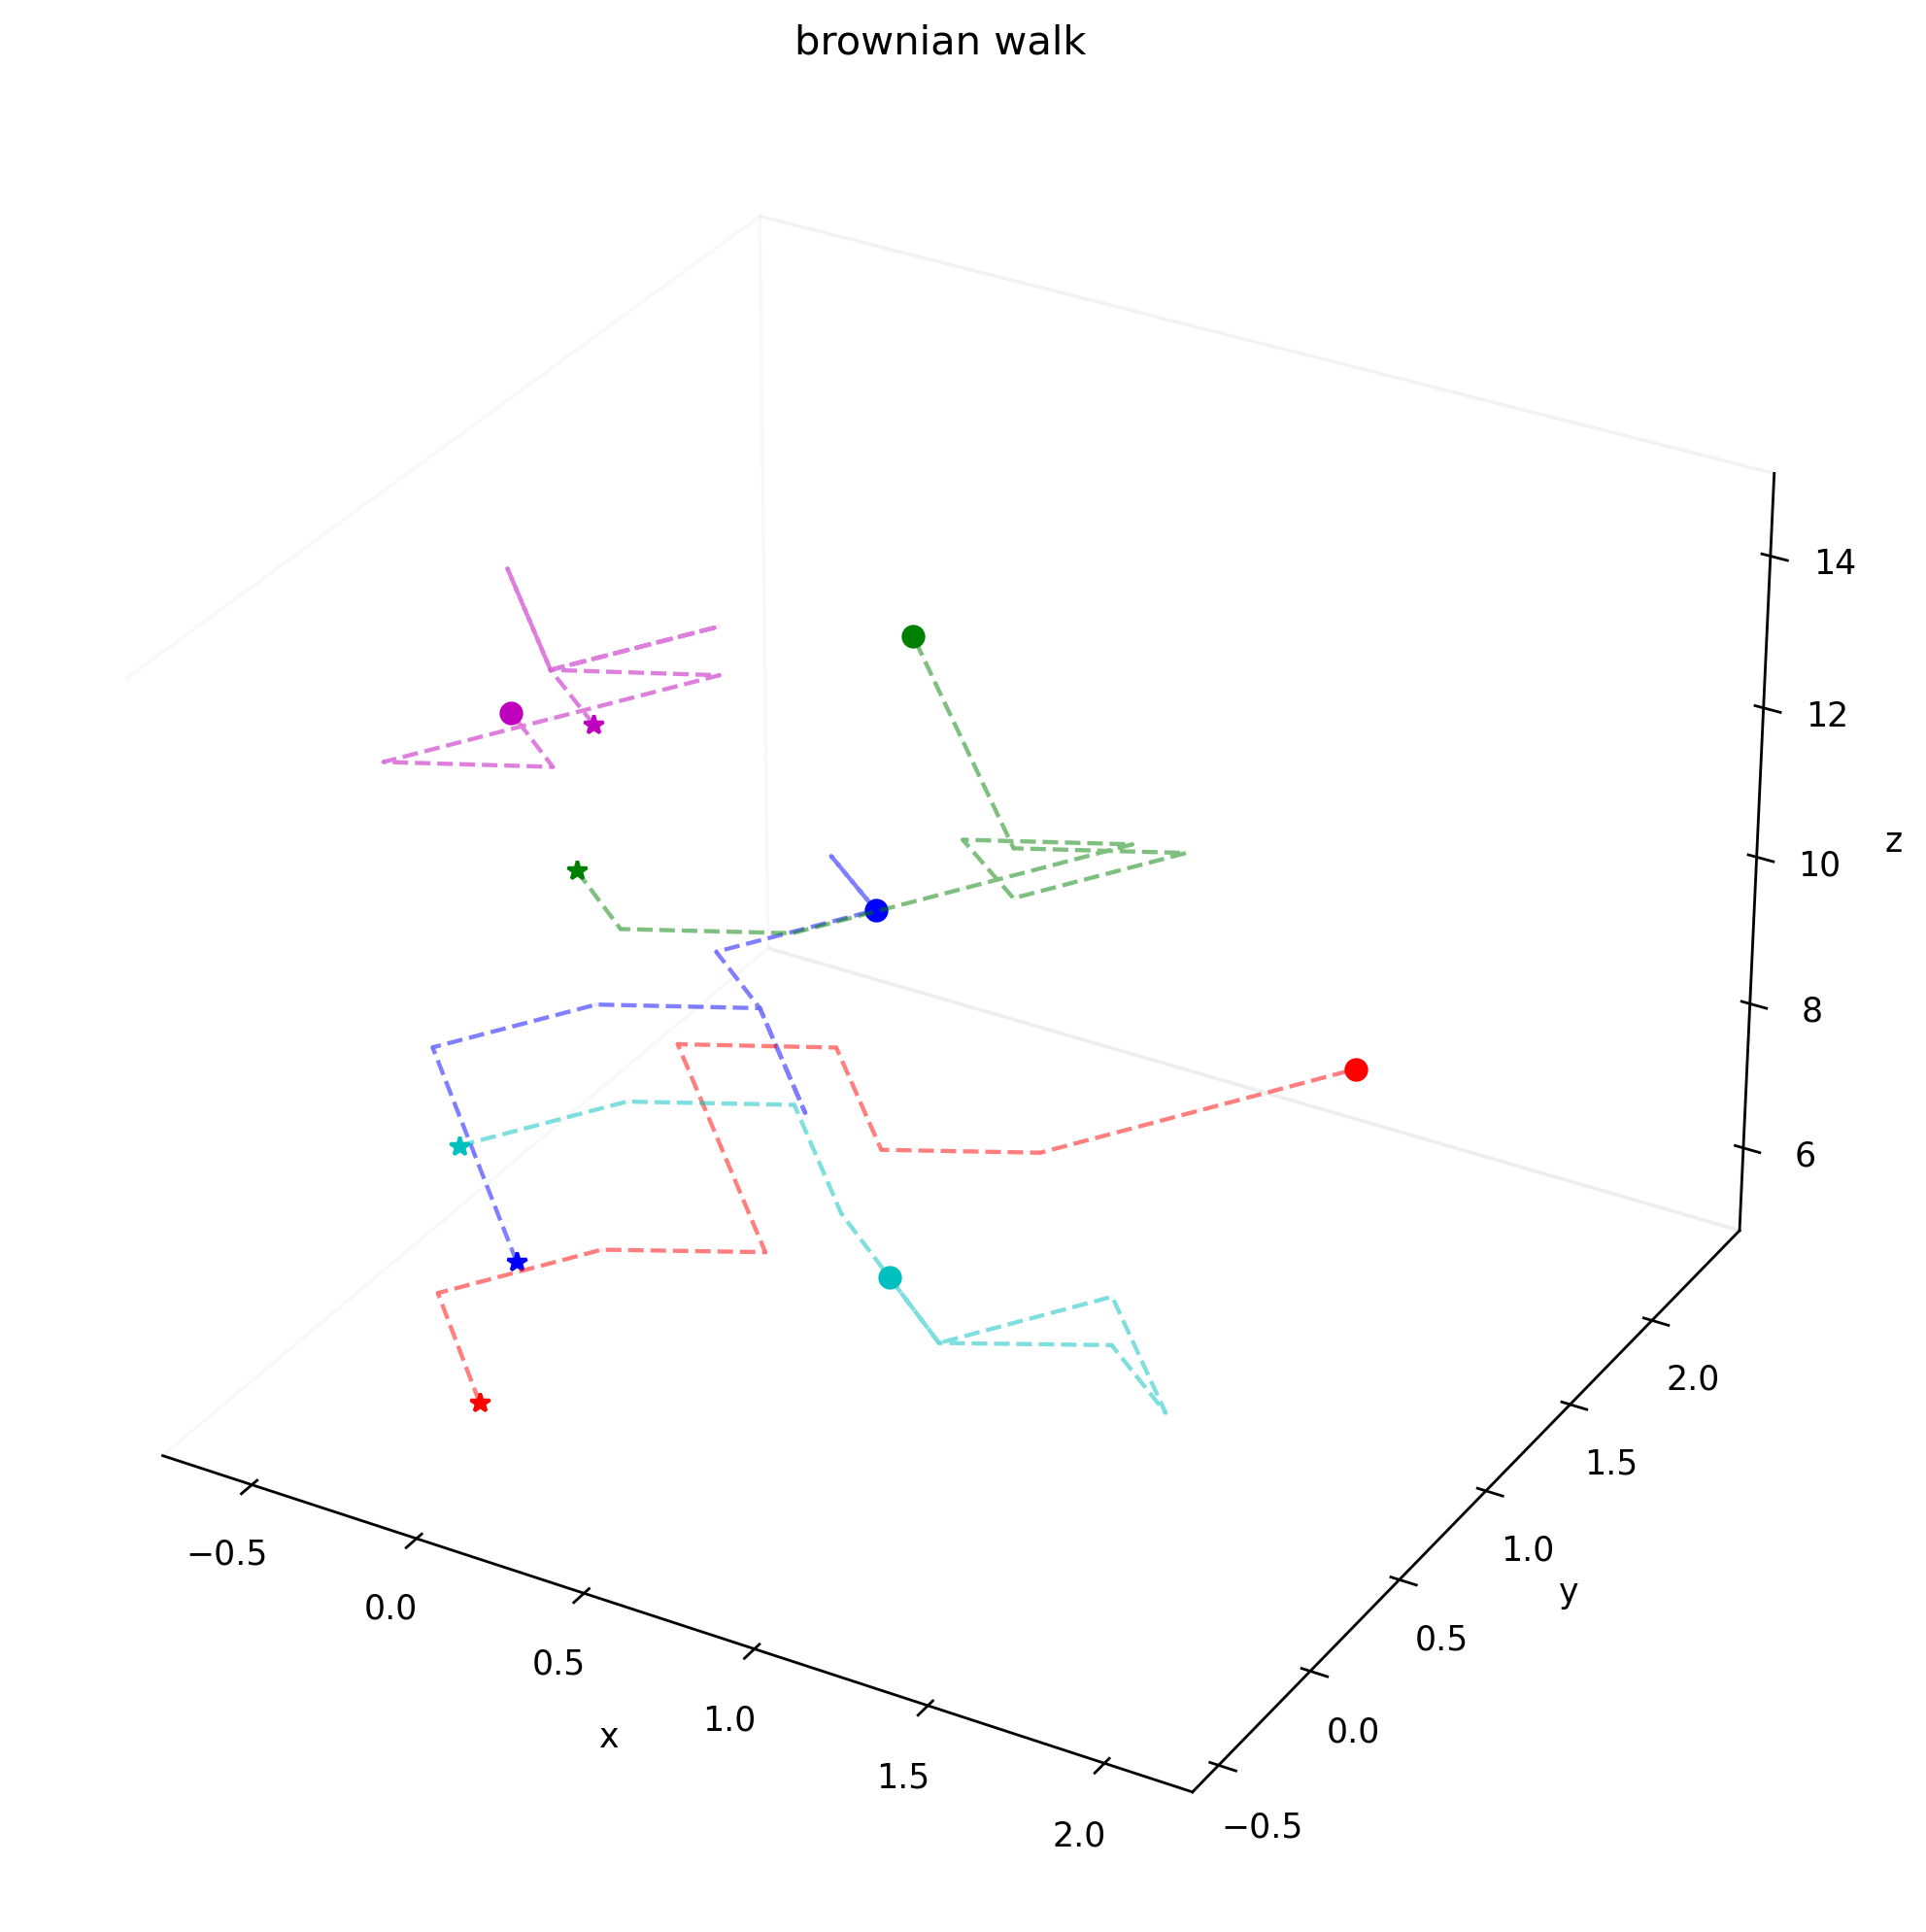

In [48]:
R = .2  # radius of pipe (ft)
L = 15  # length of pipe (ft)
runs=5 #particles 

#plotttingggggggg

fig=plt.figure(figsize=(10,10),dpi=250)
ax=fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill=ax.yaxis.pane.fill=ax.zaxis.pane.fill=False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ziprun=list(range(1,runs+1))
for i, col in zip(ziprun, colors):    
    theta = random.uniform(0, 2*math.pi)  # pick any theta 0 to 2pi
    x = R*math.cos(theta)  # on edge of pipe
    y = R*math.sin(theta)
    z = random.uniform(0, L)  # random length
    b = brownian(x, y, z)
    path=b.path(10) #number of steps    
    start=path[:1] #0th index ([start:end],':' mean everything before or after, before 1 (0) then stop position is 1 )
    stop=path[-1:] #end is start -1
    #Plot the path
    ax.scatter3D(path[:,0], path[:,1], path[:,2], c=col,alpha=0.15,s=.05); #syntax w comma:for path x,y,z is 0th,1st,2nd element of path
    ax.plot3D(path[:,0], path[:,1], path[:,2], c=col, alpha=0.5,lw=1.25, ls='--')
    ax.plot3D(start[:,0], start[:,1], start[:,2], c=col, marker='*')
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2], c=col, marker='o');
plt.title('brownian walk')


    


Text(0.5, 0.92, 'brownian walk')

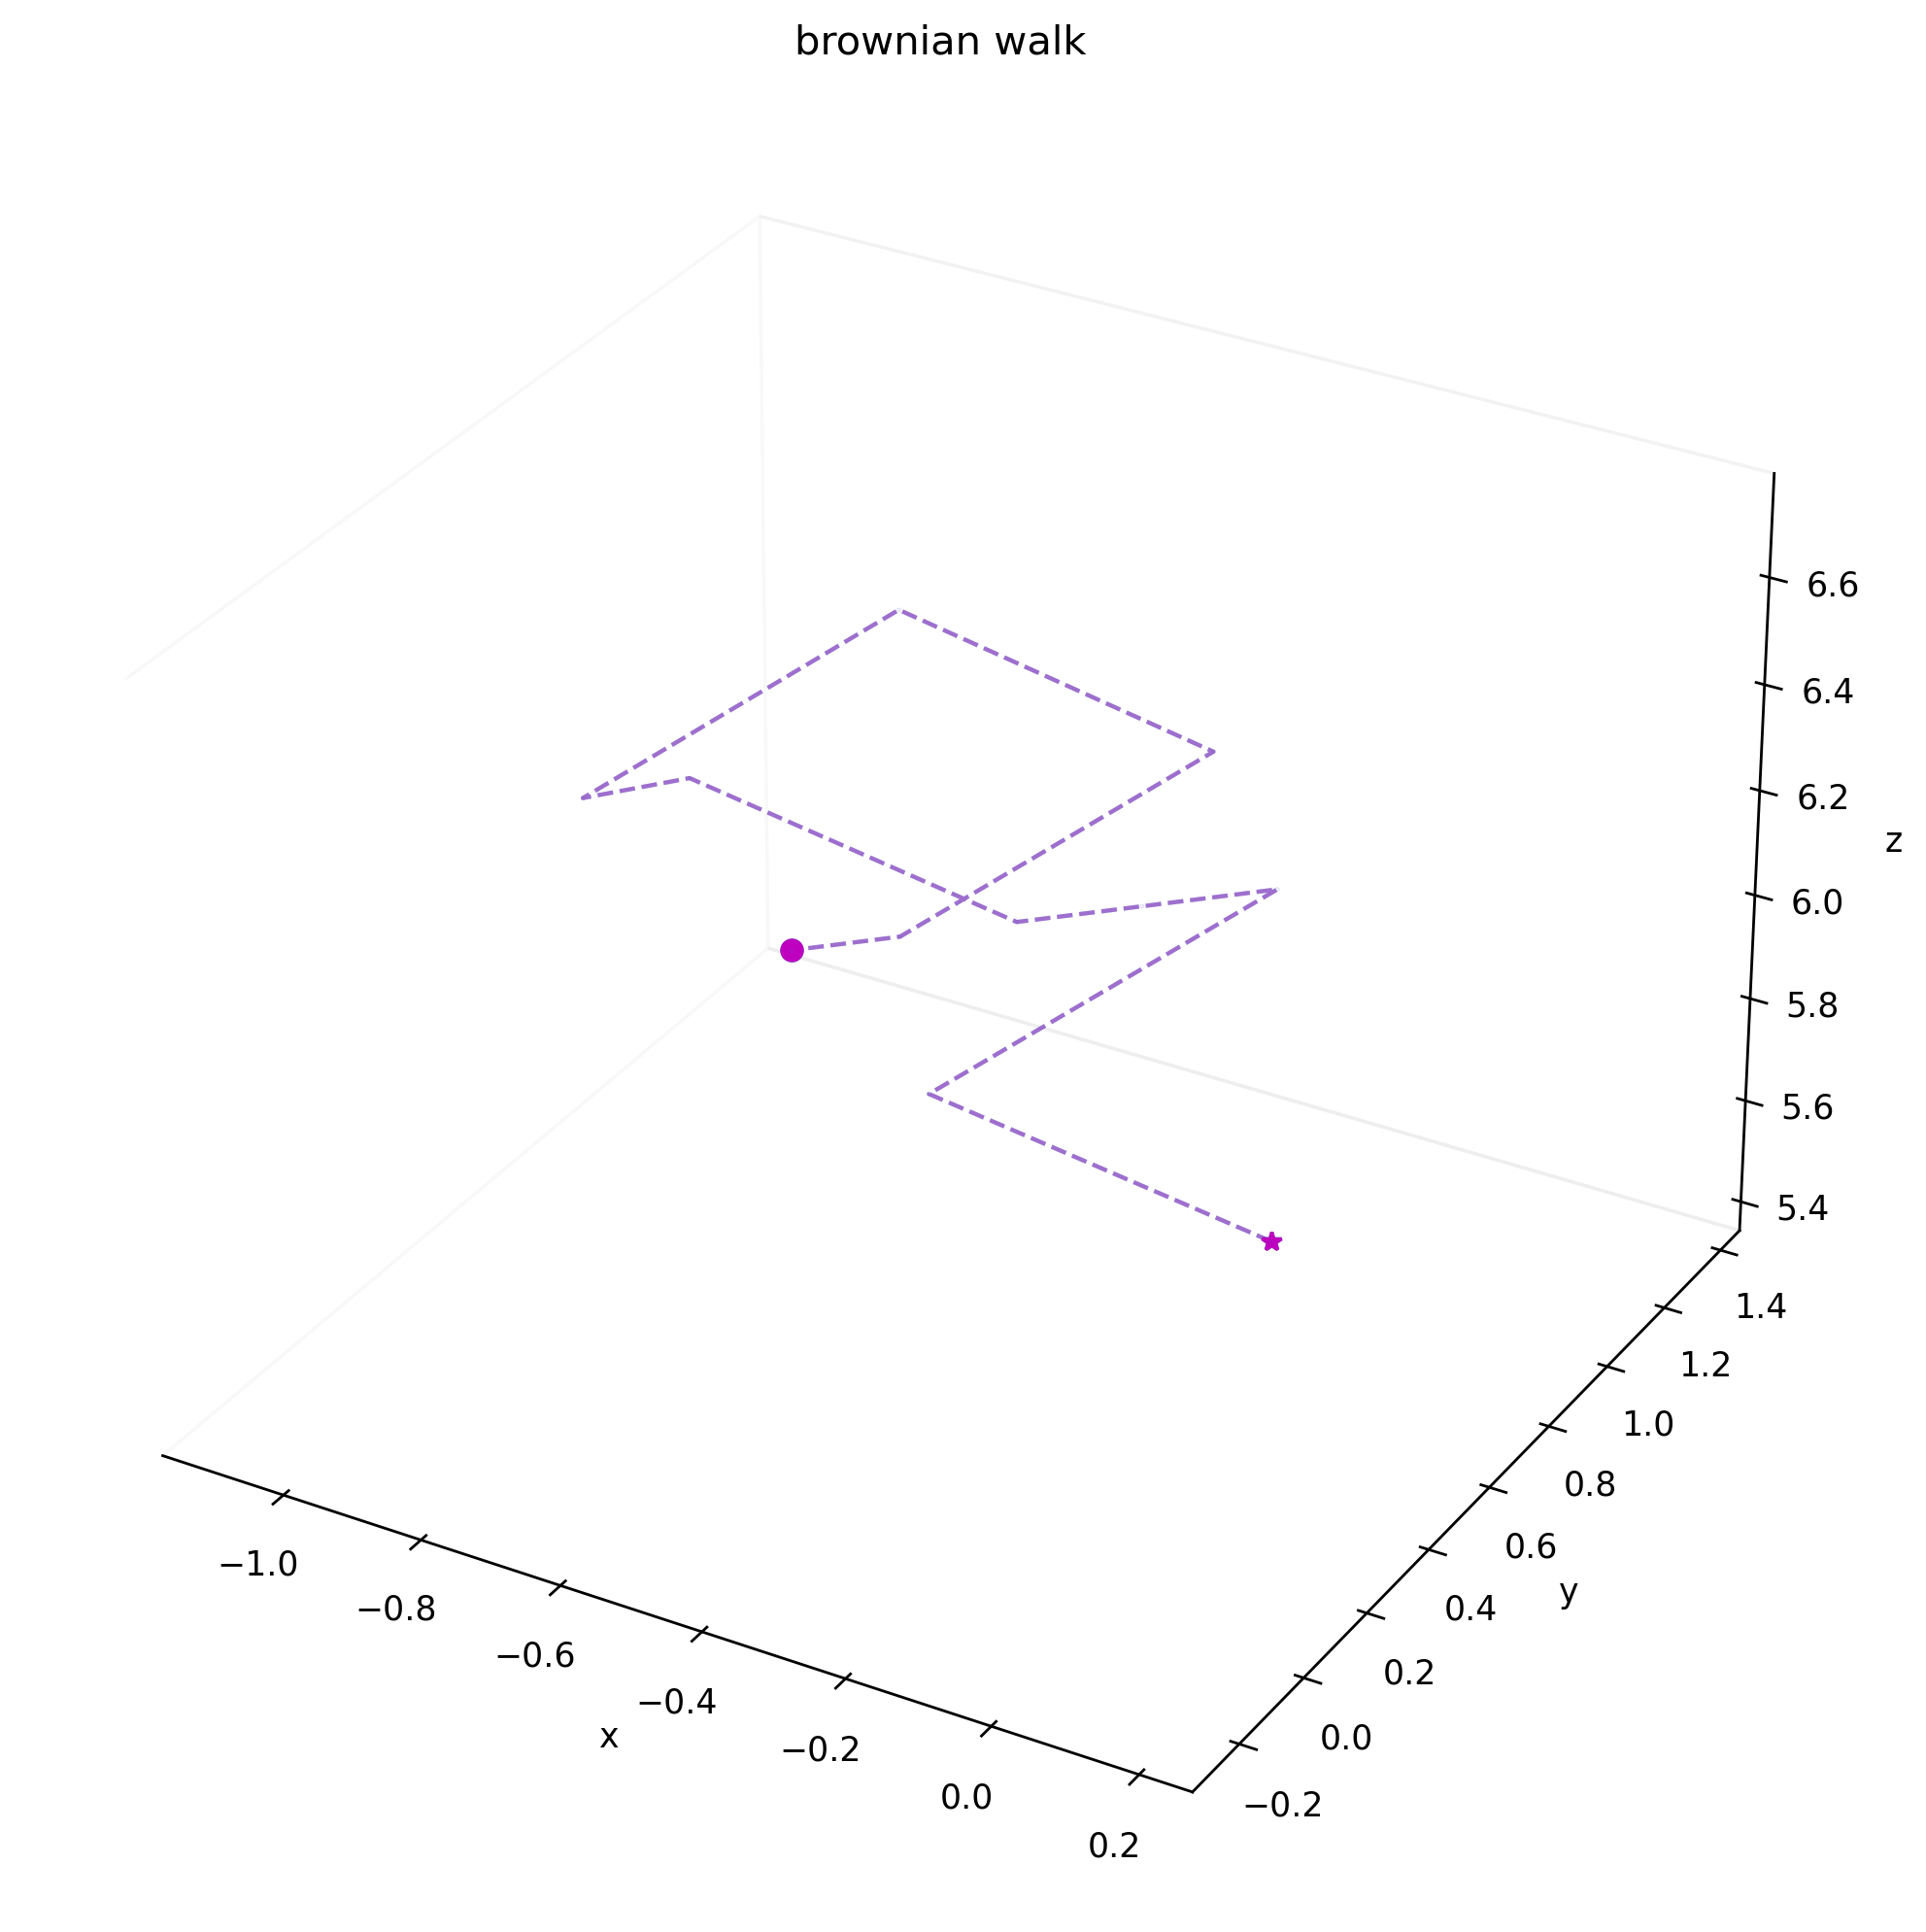